In [1]:
%matplotlib inline
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pd.options.mode.chained_assignment = None                       # permit to avoid error in copying 

In [25]:
def func_exp2(p, x, z):                                     # exponential function with multiple parameters  
#    a, b, t, t2 = p[0], p[1], p[2], p[3]
    a, b, c, d, t, t2 = p[0], p[1], p[2], p[3], p[4], p[5]
#    return a*np.exp(b + x*t + z*t2)
    return a*np.exp(b + pow(x,c)*t + pow(z,d)*t2)

def func_poly(p, x, z):                                     # polynomial function with multiple parameters
    a, t, t2, t3, t4, t5, t6 = p[0], p[1], p[2], p[3], p[4], p[5], p[6]
    return a + x*t+ z*t2 + pow(x,2)*t3 + pow(z,2)*t4 + pow(x,3)*t5 + pow(z,3)*t6

In [4]:
df = pd.read_csv('../Docs/Fichiers_tests_VR/compa_vr_PSA.csv', dtype=str, sep=';')
print(df.head(3))

  AGE     KM MARQUE_CORRECTED MODELE_CORRECTED CARBURANT_ID CARROSSERIE_ID  \
0   2  10000   DS AUTOMOBILES              DS5            2              2   
1   2  10000   DS AUTOMOBILES              DS5            2              2   
2   5  10400   DS AUTOMOBILES              DS5            2              2   

  LITRE BOITE_ID PUISSANCE_CORRECTED 4RM  ...      VR ANNEE_CORRECTED MOIS  \
0   2.0        2               180.0   N  ...   34294            2017    3   
1   2.0        2               180.0   N  ...   34294            2017    3   
2   2.0        2               180.0   N  ...   32959            2016   12   

  JOUR KMM KM_STD  KM_VR            COTE_DATE              DATE_VR SURKM  
0   27   0   2600  15000  0000-00-00 00:00:00  2017-06-26 00:00:00  4600  
1   27   0   2600  15000  0000-00-00 00:00:00  2017-06-26 00:00:00  4600  
2   26   0   6400  18750  0000-00-00 00:00:00  2017-09-25 00:00:00     0  

[3 rows x 23 columns]


In [5]:
def func_convert(data):
    cols = ['ANNEE_CORRECTED', 'MOIS', 'JOUR', 'AGE', 'KM','VR']
    for c in cols:
        data[c] = pd.to_numeric(data[c], errors='coerce')           # cast the type str to numeric
    return data

# Make the date
def func_age_vr(df):
    date_mec = [datetime(df.ANNEE_CORRECTED.iat[i], df.MOIS.iat[i], df.JOUR.iat[i]) for i in range(len(df))]
    date_VR  = [datetime.strptime(i, '%Y-%m-%d 00:00:00') for i in df.DATE_VR]
    Age_VR = [np.floor((date_VR[i] - date_mec[i]).days/30) for i in range(len(date_VR))]
    df['Age_VR']=Age_VR
    return df

In [6]:
df = func_convert(df)
df = func_age_vr(df)

In [34]:
model = 'DS5'
power = '180.0' # '120.0'
liter = '2.0'   # '1.6'
df_model = df[(df['MODELE_CORRECTED']==model) & (df['LITRE']==liter) & (df['PUISSANCE_CORRECTED']==power)]
print(len(df_model))

150


In [26]:
# param DS5 power=180 Liter=2.0 
p = [  2.78665155e+04 ,  3.82057576e-01 ,  7.54073876e-01 ,  7.15390382e-01 , -2.56313672e-02 , -8.91377428e-05]

p2= [  4.04979900e+04 , -6.72034255e+02 , -2.14226936e-01 ,  1.33277628e+01 ,  2.48056942e-06 , -8.94694197e-02 ,\
     -1.19035062e-11]
# param DS5 power=120 Liter=1.6 
#p = [  1.24378657e+04 ,  9.13142807e-01 ,  6.54203162e-01 ,  8.91798760e-01 , -2.86329357e-02 , -1.19792708e-05]

In [28]:
cote_model_exp = func_exp2(p, df_model.Age_VR.astype(int), df_model.KM_VR.astype(int))
cote_model_poly= func_poly(p2, df_model.Age_VR.astype(int), df_model.KM_VR.astype(int))
df_model['Cote_model_exp'] =cote_model_exp
df_model['Cote_model_poly']=cote_model_poly
df_model = df_model.sort_values(by='AGE')

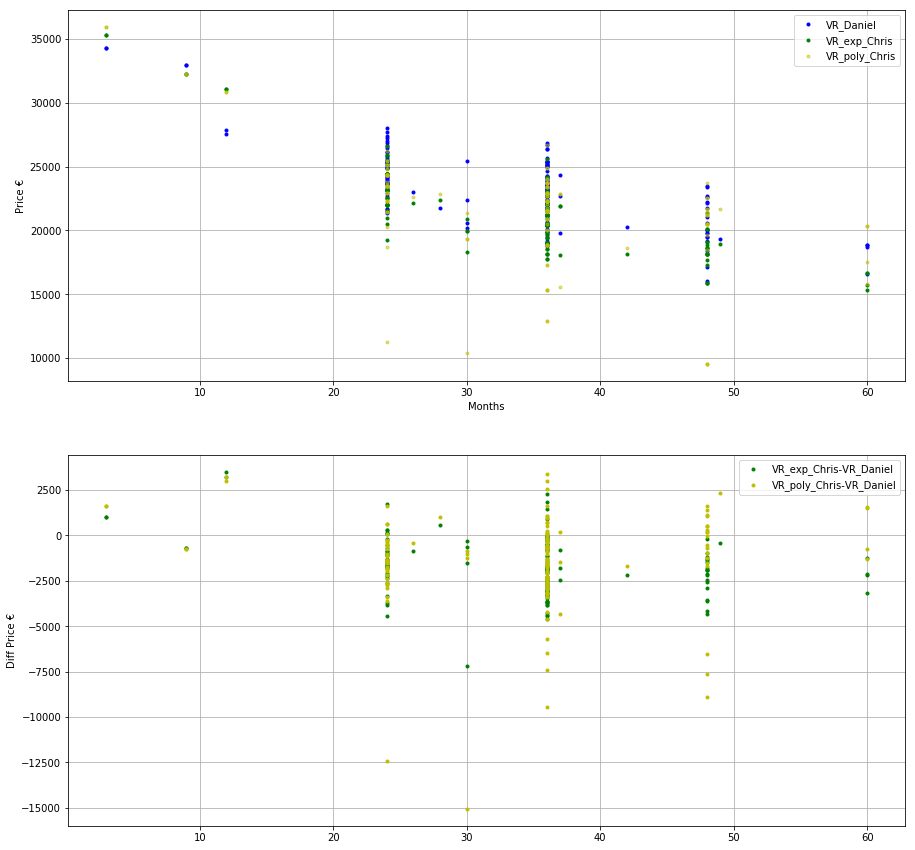

In [32]:
fig = plt.figure(figsize=(15,15))                                            # size of the all picture
ax1 = plt.subplot(211)                                                       # first subplot 1/4 
plt.plot(df_model.Age_VR, df_model.VR, 'b.', label='VR_Daniel')              # All the data, plot price = f(age)
plt.plot(df_model.Age_VR, df_model.Cote_model_exp, 'g.', label='VR_exp_Chris')  # Fit of the all data 
plt.plot(df_model.Age_VR, df_model.Cote_model_poly,'y.', alpha = 0.5, label='VR_poly_Chris') # Fit of the all data 
plt.legend()
plt.xlabel('Months')
plt.ylabel('Price €')
plt.grid(True)
ax1 = plt.subplot(212)                                                       # first subplot 1/4 
plt.plot(df_model.Age_VR, df_model.Cote_model_exp-df_model.VR, 'g.', label='VR_exp_Chris-VR_Daniel') 
plt.plot(df_model.Age_VR, df_model.Cote_model_poly-df_model.VR, 'y.', label='VR_poly_Chris-VR_Daniel') 
plt.legend()
plt.ylabel('Diff Price €')
plt.grid(True)

In [30]:
(df_model.Cote_model_exp-df_model.VR).mean()

-1704.8330045145742

In [31]:
(df_model.Cote_model_poly-df_model.VR).mean()

-1381.2287161110066